In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import retentioneering
import matplotlib.pyplot as plt

In [3]:
data1_1 = pd.read_csv('experiment1_1.csv')
data1_2 = pd.read_csv('experiment1_2.csv')
data2_1 = pd.read_csv('experiment2_1.csv')
data2_2 = pd.read_csv('experiment2_2.csv')

### 1) Изучим данные

In [4]:
data1_1.head()

,client_id,user_session,timestamp,event,session
0,10505,1,2020-05-01 00:00:00.000000000,main,105051
1,10505,1,2020-05-01 00:00:00.000000000,phones,105051
2,10505,1,2020-05-01 00:00:00.000000000,phones/apple,105051
3,10505,1,2020-05-01 00:00:00.000000000,phones,105051
4,10505,1,2020-05-01 00:00:00.000000000,main,105051


In [11]:
data1_1['event'].value_counts()

main                    73526
phones                  61311
phones/apple            45289
lost                    40200
laptops                 36398
item_details            25522
laptops/xiaomi/1234     18242
laptops/xiaomi          17159
phones/apple/123        15013
item_reviews             6616
support                  5260
cart                     2821
fill_user_info           1996
support/message_sent     1939
checkout                  786
payment_done              138
Name: event, dtype: int64

In [12]:
data1_2['event'].value_counts()

main                    74269
phones                  61593
phones/apple            45642
lost                    40378
laptops                 36829
item_details            25657
laptops/xiaomi/1234     18479
laptops/xiaomi          17324
phones/apple/123        15362
item_reviews             6485
support                  5201
cart                     2724
fill_user_info           1988
support/message_sent     1858
checkout                  862
payment_done              154
Name: event, dtype: int64

In [13]:
data2_1['event'].value_counts()

main                    73526
phones                  61311
phones/apple            45289
lost                    40200
laptops                 36398
item_details            25522
laptops/xiaomi/1234     18242
laptops/xiaomi          17159
phones/apple/123        15013
item_reviews             6616
support                  5260
cart                     2821
fill_user_info           1996
support/message_sent     1939
checkout                  786
payment_done              138
Name: event, dtype: int64

In [14]:
data2_2['event'].value_counts()

phones                  103255
main                     92897
phones/apple             86718
item_details             65636
laptops                  49822
laptops/xiaomi/1234      40998
lost                     39266
phones/apple/123         35741
laptops/xiaomi           31675
item_reviews             18064
support                  14547
cart                      8582
fill_user_info            6971
support/message_sent      6439
checkout                  3109
payment_done               953
Name: event, dtype: int64

Построим граф переходов для данных для понимания поведения пользователей.

In [14]:
retentioneering.config.update({
    'event_col':'event',
    'event_time_col':'timestamp',
    'user_col': 'client_id'
})

data1_1.rete.plot_graph(norm_type='full',
                     weight_col='client_id',
                     thresh=0.02,
                     targets = {'payment_done':'green', 'lost':'red'})

'experiments/graph_2021-05-08 09_52_26_282193.html'

![title](graph.png)

Пользователь попадает из главного экран в две категории Laptops и Phones из них он может выбрать только определенные марки и модели  xiaomi/1234 и apple/123, далее один экран просмотра деталей с выходом на окно поддержки или отзывов с последующим попаданием в корзину и оплатой

### 2) Интерпретируем результаты тестов

Будем считать целью теста выяснить изменение конверсии в покупку (ивент payment_done), сравним показатели для двух тестов с использованием теста Манна-Уитни и порогового P-value 0.05

In [54]:
data1 = data1_1.append(data1_2)

test (mean ± SD): 0.030 ± 0.171, n = 5000
control (mean ± SD): 0.028 ± 0.164, n = 5000
'test' is greater than 'control' with P-value: 0.21889
power of the test: 19.25%


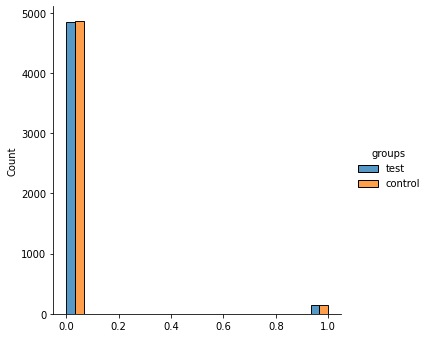

In [61]:
conversion = lambda x: int(['payment_done'] in x['event'].unique())
test = data1_2['client_id'].unique()
control = data1_1['client_id'].unique()

data1.rete.compare(groups=(test, control),
                  function=conversion,
                  test='mannwhitneyu',
                  group_names=('test','control'))

test (mean ± SD): 0.175 ± 0.380, n = 5000
control (mean ± SD): 0.028 ± 0.164, n = 5000
'test' is greater than 'control' with P-value: 0.00000
power of the test: 100.00%


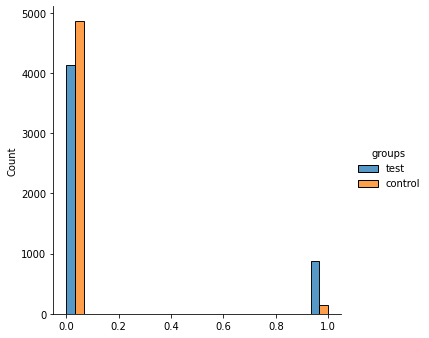

In [63]:
data2 = data2_1.append(data2_2)

test = data2_2['client_id'].unique()
control = data2_1['client_id'].unique()

data2.rete.compare(groups=(test, control),
                  function=conversion,
                  test='mannwhitneyu',
                  group_names=('test','control'))

В первом тесте нет статистически значимых изменений в конверсии, поэтому тест никак не повлиял на покупки. Однако во втором тесте мы можем со 100% вероятностью заявить что он положительно повлиял на покупки и эти изменения стоит выкатить на всех пользователей